In [1]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
import qiskit.circuit.library as qulib
import qiskit.quantum_info as qi
import numpy as np

M_simulator = Aer.get_backend('qasm_simulator')
S_simulator = Aer.get_backend('statevector_simulator')
U_simulator = Aer.get_backend('unitary_simulator')

# 5. High-Performance Simulators

---
## Question 5.1

**What is the result of this circuit when run on the `StatevectorSimulator`?**

<img src="..\questions\simulators_images\q2.png" align="left"/>

**1)**  `[0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
 0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j]`

**2)**  `[0.70710678+0.j, 0.70710678+0.j, 0.70710678+0.j, 0.70710678+0.j, 
 0.70710678+0.j, 0.70710678+0.j, 0.70710678+0.j, 0.70710678+0.j]`

**3)**  `[0.+0.70710678j, 0.70710678+0.j, 0.+0.70710678j, 0.70710678+0.j, 
 0.+0.70710678j, 0.70710678+0.j, 0.+0.70710678j, 0.70710678+0.j]`

**4)**  `[0.35355339+0.j, 0.+0.35355339j, 0.35355339+0.j, 0.+0.35355339j, 
 0.35355339+0.j, 0.+0.35355339j, 0.35355339+0.j, 0.+0.35355339j]`

**5)** None of the above

### Solution to Q5.1:

Let's implement the circuit:

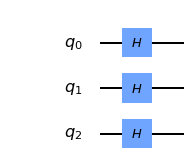

In [2]:
qc_hp1 = QuantumCircuit(3)
qc_hp1.h([0,1,2])
qc_hp1.draw('mpl')

Now, let's execute the simulation using the `statevector_simulator` backend:

In [3]:
result_hp1 = execute(qc_hp1, backend = S_simulator).result()
state_hp1 = result_hp1.get_statevector()
print(state_hp1)

[0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j
 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j]


### Answer to Q5.1: 
1) `[0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j
    0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j]`

---
## Question 5.2

**You can also use `Statevector` class in the `quantum_info` module to simulate circuits and obtain state vector.
Given the following code, which option produces a different state vector from the rest?**

```
import qiskit.quantum_info as qi
import numpy as np
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
```

**1)** `qi.Statevector.from_instruction(qc)`

**2)** `qi.Statevector(np.array([1, 0, 1, 0]) / np.sqrt(2))`

**3)** `np.sqrt(0.5) * (qi.Statevector.from_label('00') + qi.Statevector.from_label('11'))`

**4)** `qi.Statevector.from_label('00').evolve(qc)`

**5)** None of the above

### Solution to Q5.2:

Let's first implement the circuit:

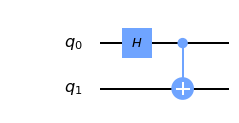

In [4]:
qc_hp2_1 = QuantumCircuit(2)
qc_hp2_1.h(0)
qc_hp2_1.cx(0,1)
qc_hp2_1.draw('mpl')

Now let's run all four given options to see which one differs from the others:

In [5]:
state_hp2_1 = qi.Statevector.from_instruction(qc_hp2_1)
print(state_hp2_1.data)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


In [6]:
state_hp2_2 = qi.Statevector(np.array([1, 0, 1, 0]) / np.sqrt(2))
print(state_hp2_2.data)

[0.70710678+0.j 0.        +0.j 0.70710678+0.j 0.        +0.j]


In [7]:
state_hp2_3 = np.sqrt(0.5) * (qi.Statevector.from_label('00') + qi.Statevector.from_label('11'))
print(state_hp2_3.data)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


In [8]:
state_hp2_4 = qi.Statevector.from_label('00').evolve(qc_hp2_1)
print(state_hp2_4.data)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


### Answer to Q5.2: 

**2)** `qi.Statevector(np.array([1, 0, 1, 0]) / np.sqrt(2))`

---
## Question 5.3

**What is the result of this circuit when run on the `UnitarySimulator?`**

<img src="..\questions\simulators_images\q3.png" align="left"/>

**1)** ```[[ 0.+0.j  0.+0.j  0.+0.j  1.+0.j]
  [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
  [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
  [-1.+0.j  0.+0.j  0.+0.j  0.+0.j]]```
 
**2)**  ```[[ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
  [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
  [ 0.+0.j  0.+0.j  0.+0.j  1.+0.j]
  [-1.+0.j  0.+0.j  0.+0.j  0.+0.j]]```
 
**3)**  ```[[ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
  [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
  [ 0.+0.j  0.+0.j  0.+0.j  1.+0.j]
  [-1.+0.j  0.+0.j  0.+0.j  0.+0.j]]```
 
**4)**  ```[[ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
  [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
  [ 0.+0.j  0.+0.j  0.+0.j  1.+0.j]
  [-1.+0.j  0.+0.j  0.+0.j  0.+0.j]]```
 
 **5)** None of the above

### Solution to Q5.3:

Let's implement the circuit, and then execute a simulation using the `unitary_simulator` backend:

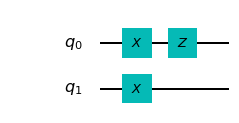

In [9]:
qc_hp3 = QuantumCircuit(2)
qc_hp3.x([0,1])
qc_hp3.z(0)
qc_hp3.draw('mpl')

In [10]:
result_hp3 = execute(qc_hp3, backend = U_simulator).result()
unitary_hp3 = result_hp3.get_unitary()
print(unitary_hp3)

[[ 0.+0.j  0.+0.j  0.+0.j  1.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [-1.+0.j  0.+0.j  0.+0.j  0.+0.j]]


### Answer to Q5.3:

**1)** `[[ 0.+0.j  0.+0.j  0.+0.j  1.+0.j]
  [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
  [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
  [-1.+0.j  0.+0.j  0.+0.j  0.+0.j]]`

---
## Question 5.4

**You can also use Operator class in the quantum_info module to simulate circuits and obtain unitary.
Given the following code, which option produces a different unitary from the rest?**

```
import qiskit.quantum_info as qi
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
```

**1)** `qi.Operator(qc)`

**2)** `qi.Operator.from_label('II').compose(HGate(), [0]).compose(CXGate(), [0, 1])`

**3)** `qi.Operator.from_label('HI') + qi.Operator.from_label('CX')`

**4)** `qi.Operator.from_label('II').compose(qc)`

**5)**  None of the above

### Solution to Q5.4:

From the Qiskit documentation for [Operator.from_label](https://qiskit.org/documentation/stubs/qiskit.quantum_info.Operator.from_label.html) we can see that the only valid labels correspond to those associated with single-qubit matrices. Since 'CX' would correspond to the label of a two-quibt matrix, we know that **option 3** will not produce a unitary.

We can also just check each of the available options to check this:

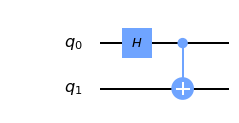

In [11]:
qc_hp4 = QuantumCircuit(2)
qc_hp4.h(0)
qc_hp4.cx(0,1)
qc_hp4.draw('mpl')

In [12]:
unitary_hp4_1 = qi.Operator(qc_hp4)
print(unitary_hp4_1.data)

[[ 0.70710678+0.j  0.70710678+0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j -0.70710678+0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j  0.70710678+0.j]
 [ 0.70710678+0.j -0.70710678+0.j  0.        +0.j  0.        +0.j]]


In [13]:
unitary_hp4_2 = qi.Operator.from_label('II').compose(qulib.HGate(), [0]).compose(qulib.CXGate(), [0, 1])
print(unitary_hp4_2.data)

[[ 0.70710678+0.j  0.70710678+0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j -0.70710678+0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j  0.70710678+0.j]
 [ 0.70710678+0.j -0.70710678+0.j  0.        +0.j  0.        +0.j]]


In [14]:
# This will give an error for the reason mentioned above
unitary_hp4_3 = qi.Operator.from_label('HI') + qi.Operator.from_label('CX')
print(unitary_hp4_3.data)

QiskitError: 'Label contains invalid characters.'

In [15]:
unitary_hp4_4 = qi.Operator.from_label('II').compose(qc_hp4)
print(unitary_hp4_4.data)

[[ 0.70710678+0.j  0.70710678+0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j -0.70710678+0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j  0.70710678+0.j]
 [ 0.70710678+0.j -0.70710678+0.j  0.        +0.j  0.        +0.j]]


### Answer to Q5.4:

3) `qi.Operator.from_label('HI') + qi.Operator.from_label('CX')`

---
## Question 5.5

**Which of the following histograms could be the result of this circuit when run on `QasmSimulator`?**

<img src="..\questions\simulators_images\q1.png" align="left"/>

**1)** <img src="..\questions\simulators_images\1_w1.png"/>

**2)** <img src="..\questions\simulators_images\1_w2.png"/>

**3)** <img src="..\questions\simulators_images\1_w3.png"/>

**4)** <img src="..\questions\simulators_images\1_w4.png"/>

**5)** None of the above

### Solution to Q5.5:

We can then implement this circuit, and execute the simulation using the `qasm_simulator` backend:

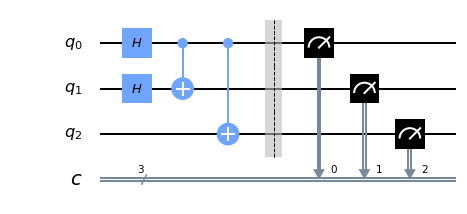

In [16]:
qc_hp5 = QuantumCircuit(3,3)
qc_hp5.h([0,1])
qc_hp5.cx([0,0],[1,2])
qc_hp5.barrier()
qc_hp5.measure([0,1,2],[0,1,2])
qc_hp5.draw('mpl')

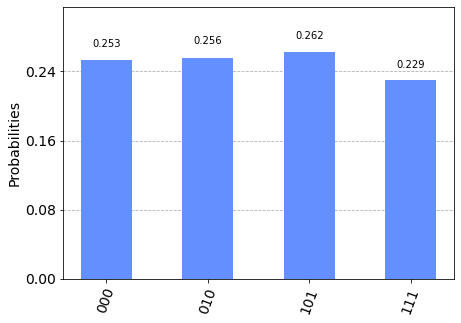

In [17]:
result_hp5 = execute(qc_hp5, backend = M_simulator, shots = 1024).result()
counts_hp5 = result_hp5.get_counts()
plot_histogram(counts_hp5)

### Answer to Q5.5:

**3)** Histogram shown above

---
## Question 5.6

Which of these configuration options could result in the following result object/counts?
```
qc = QuantumCircuit(2)
qc.h([0,1])
qc.measure_all()
     
result = execute(*what goes in here?*).result()
memory = result.get_memory(qc)
print(memory)
   
> ['01', '10', '00', '11', '00', '10', '00', '01', '00', '11', '11', '11', '11',' 11',' 11']
```

**1)** `execute(qc, StatevectorSimulator(), shots=15, memory=True)`

**2)** `execute(qc, QasmSimulator(), shots=10, memory=True)`

**3)** `execute(qc, QasmSimulator(), shots=15, memory=True)`

**4)** `execute(qc, QasmSimulator(), shots=15, memory=False)`

**5)** None of the above

### Solution to Q5.6:

We can execute each of the different options, and see which one provides an output that resembles the list of results provided in the question:

In [18]:
qc_hp6 = QuantumCircuit(2)
qc_hp6.h([0,1])
qc_hp6.measure_all()
     
result_hp6_1 = execute(qc_hp6, backend = S_simulator, shots=15, memory=True).result()
memory_hp6_1 = result_hp6_1.get_memory(qc_hp6)
print(memory_hp6_1)

['11']


In [19]:
result_hp6_2 = execute(qc_hp6, backend = M_simulator, shots=10, memory=True).result()
memory_hp6_2 = result_hp6_2.get_memory(qc_hp6)
print(memory_hp6_2)

['11', '00', '10', '01', '00', '11', '00', '01', '10', '01']


In [20]:
result_hp6_3 = execute(qc_hp6, backend = M_simulator, shots=15, memory=True).result()
memory_hp6_3 = result_hp6_3.get_memory(qc_hp6)
print(memory_hp6_3)

['11', '01', '00', '00', '00', '00', '00', '00', '01', '11', '10', '10', '01', '11', '10']


In [21]:
# This will give an error because memory was set to `False`, so there is no memory for the experiment
result_hp6_4 = execute(qc_hp6, backend = M_simulator, shots=15, memory=False).result()
memory_hp6_4 = result_hp6_4.get_memory(qc_hp6)
print(memory_hp6_4)

QiskitError: 'No memory for experiment "        ┌───┐ ░ ┌─┐   \n   q_0: ┤ H ├─░─┤M├───\n        ├───┤ ░ └╥┘┌─┐\n   q_1: ┤ H ├─░──╫─┤M├\n        └───┘ ░  ║ └╥┘\nmeas_0: ═════════╩══╬═\n                    ║ \nmeas_1: ════════════╩═\n                      ".'

### Answer to Q5.6:

**3)** `execute(qc, QasmSimulator(), shots=15, memory=True)`

---
## Question 5.7

Clifford circuits can be efficiently simulated classically in Qiskit using Clifford class in the quantum_info module.
Which of the following is not a Clifford gate?
**1)** `XGate`

**2)** `SdgGate`

**3)** `CXGate`

**4)** `RZGate`

**5)** None of the above

### Solution to Q5.7:

From Qiskit's documentation on [Clifford gates](https://qiskit.org/documentation/stubs/qiskit.quantum_info.Clifford.html), we can see which of the ones above is not part of this family.

### Answer to Q5.7:

**4)** `RzGate`